In [1]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
#import mpl_scatter_density
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec
from scipy.stats import gaussian_kde
import skimage
import plotly.graph_objects as go

from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans

import matplotlib
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from statistics import mode
from matplotlib import transforms
import netCDF4

import os
import moviepy.video.io.ImageSequenceClip
from IPython.display import Video

import dash_bio
import seaborn

In [2]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [3]:
m3_k3 = np.load("Compressed_Data/M3_K_3_ELBO_Clustered_By_M3.npy")
m3_k50 = np.load("Compressed_Data/K_50_M3_Clustered_By_M3.npy")
m2_elbo = np.load("../../Compressed_Data/M2_ELBO_Clustered_By_M3.npy")
m2_prior = np.abs(np.load("../../Compressed_Data/M2_Prior_Clustered_By_M3.npy"))

# Anomaly Threshold Design

# IQR and STD

In [4]:
m3_k3_sum = np.empty(shape=(len(m3_k3)))
m3_k50_sum = np.empty(shape=(len(m3_k3)))
m2_elbo_sum = np.empty(shape=(len(m3_k3)))
m2_prior_sum = np.empty(shape=(len(m3_k3)))

for i in range(len(m3_k3_sum)):
    m3_k3_sum[i] = np.sum(m3_k3[:,i]) 
    m3_k50_sum[i] = np.sum(m3_k50[:,i])
    m2_elbo_sum[i] = np.sum(m2_elbo[:,i]) 
    m2_prior_sum[i] = np.sum(m2_prior[:,i])

In [5]:
m3_k3_IQR_75, m3_k3_IQR_25  = np.percentile(m3_k3_sum, [75 ,25])
m3_k50_IQR_75, m3_k50_IQR_25 = np.percentile(m3_k50_sum, [75 ,25])
m2_elbo_IQR_75, m2_elbo_IQR_25 = np.percentile(m2_elbo_sum, [75 ,25])
m2_prior_IQR_75, m2_prior_IQR_25 = np.percentile(m2_prior_sum, [75 ,25])

m3_k3_IQR_mean  = np.mean(m3_k3_sum)
m3_k50_IQR_mean = np.mean(m3_k50_sum)
m2_elbo_IQR_mean = np.mean(m2_elbo_sum)
m2_prior_IQR_mean = np.mean(m2_prior_sum)

m3_k3_IQR_std  = np.std(m3_k3_sum)
m3_k50_IQR_std = np.std(m3_k50_sum)
m2_elbo_IQR_std = np.std(m2_elbo_sum)
m2_prior_IQR_std = np.std(m2_prior_sum)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


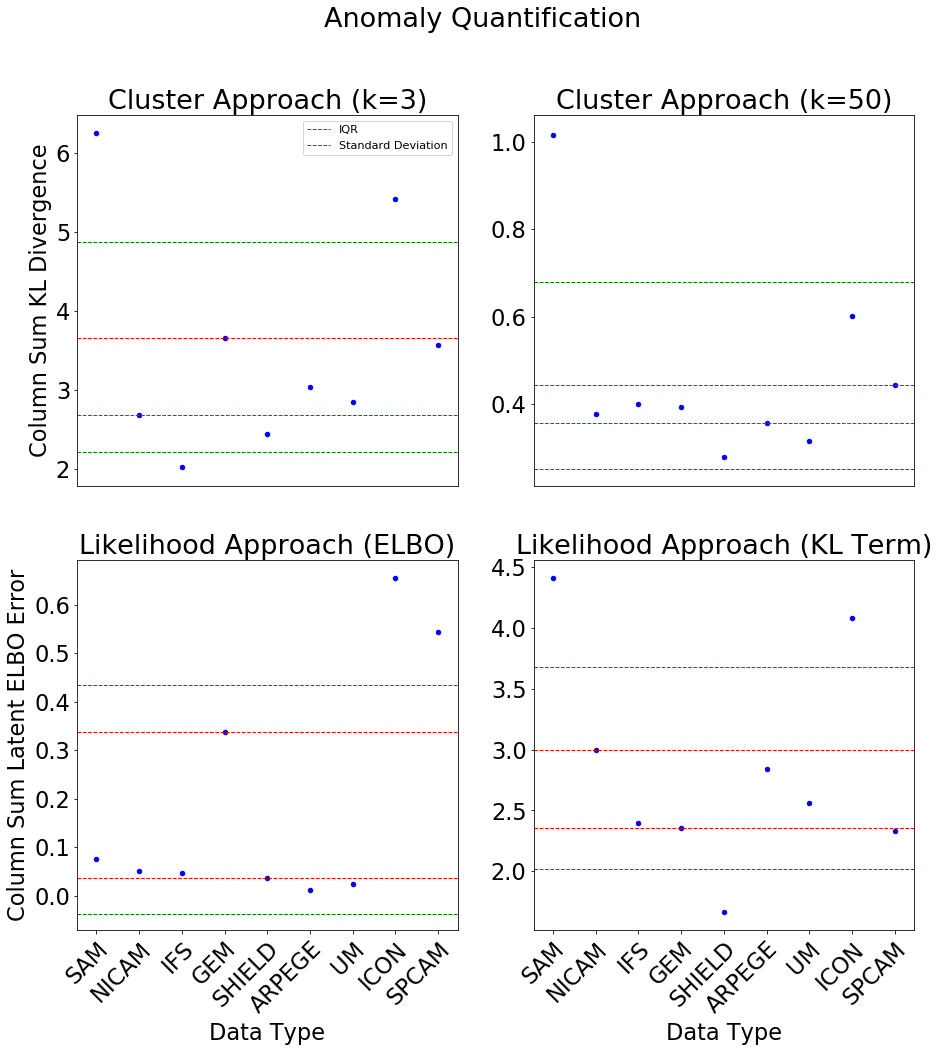

In [6]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
models = ["SAM","NICAM","IFS","GEM","SHIELD","ARPEGE","UM","ICON","SPCAM"]
x_values = np.arange(0,9,1)


ax[1,0].set_xlabel("Data Type")
ax[1,1].set_xlabel("Data Type")
ax[0,0].set_ylabel("Column Sum KL Divergence")
ax[1,0].set_ylabel("Column Sum Latent ELBO Error")
ax[0,0].set_xticks(np.arange(len(models)))
ax[0,1].set_xticks(np.arange(len(models)))
ax[1,0].set_xticks(np.arange(len(models)))
ax[1,1].set_xticks(np.arange(len(models)))
ax[1,0].set_xticklabels(models)
ax[1,1].set_xticklabels(models)
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])

ax[0,0].axhline(y=m3_k3_IQR_75, color='r', linestyle='--', label="IQR", linewidth=1)
ax[0,0].axhline(y=m3_k3_IQR_25, color='r', linestyle='--', linewidth=1)
ax[0,1].axhline(y=m3_k50_IQR_25, color='r', linestyle='--', linewidth=1)
ax[0,1].axhline(y=m3_k50_IQR_75, color='r', linestyle='--', linewidth=1)
ax[1,0].axhline(y=m2_elbo_IQR_25, color='r', linestyle='--', linewidth=1)
ax[1,0].axhline(y=m2_elbo_IQR_75, color='r', linestyle='--', linewidth=1)
ax[1,1].axhline(y=m2_prior_IQR_25, color='r', linestyle='--', linewidth=1)
ax[1,1].axhline(y=m2_prior_IQR_75, color='r', linestyle='--', linewidth=1)

ax[0,0].axhline(y=m3_k3_IQR_mean + m3_k3_IQR_std, color='g', linestyle='--', label="Standard Deviation", linewidth=1)
ax[0,0].axhline(y=m3_k3_IQR_mean - m3_k3_IQR_std, color='g', linestyle='--', linewidth=1)
ax[0,1].axhline(y=m3_k50_IQR_mean + m3_k50_IQR_std, color='g', linestyle='--', linewidth=1)
ax[0,1].axhline(y=m3_k50_IQR_mean - m3_k50_IQR_std, color='g', linestyle='--', linewidth=1)
ax[1,0].axhline(y=m2_elbo_IQR_mean + m2_elbo_IQR_std, color='g', linestyle='--', linewidth=1)
ax[1,0].axhline(y=m2_elbo_IQR_mean - m2_elbo_IQR_std, color='g', linestyle='--', linewidth=1)
ax[1,1].axhline(y=m2_prior_IQR_mean + m2_prior_IQR_std, color='g', linestyle='--', linewidth=1)
ax[1,1].axhline(y=m2_prior_IQR_mean - m2_prior_IQR_std, color='g', linestyle='--', linewidth=1)

ax[0,0].scatter(x_values, m3_k3_sum, s=20, c="b")
ax[0,1].scatter(x_values, m3_k50_sum, s=20, c="b")
ax[1,0].scatter(x_values, m2_elbo_sum, s=20, c="b")
ax[1,1].scatter(x_values, m2_prior_sum, s=20, c="b")

ax[0,0].set_title("Cluster Approach (k=3)")
ax[0,1].set_title("Cluster Approach (k=50)")
ax[1,0].set_title("Likelihood Approach (ELBO)")
ax[1,1].set_title("Likelihood Approach (KL Term)")
ax[0,0].legend(fontsize=fz*0.5)

#ax.legend()
plt.setp(ax[1,0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[1,1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.suptitle("Anomaly Quantification")
plt.savefig("Figures/Outliers_STD.png")

## Modified Z Score M

https://stats.stackexchange.com/questions/78609/outlier-detection-in-very-small-sets

In [7]:
m3_k3_MAD = scipy.stats.median_absolute_deviation(m3_k3_sum)
m3_k50_MAD = scipy.stats.median_absolute_deviation(m3_k50_sum)
m2_elbo_MAD = scipy.stats.median_absolute_deviation(m2_elbo_sum)
m2_prior_MAD = scipy.stats.median_absolute_deviation(m2_prior_sum)

/export/home/gmooers/miniconda3/envs/CPU_GEO/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

`median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.


/export/home/gmooers/miniconda3/envs/CPU_GEO/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning:

`median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.


/export/home/gmooers/miniconda3/en

In [8]:
def M_Gen(array, array_MAD):
    output = np.empty(shape=(len(array)))
    med = np.median(array)
    for i in range(len(array)):
        output[i] = 0.6745*(array[i]-med)/array_MAD
    
    return output

In [9]:
m3_k3_M = M_Gen(m3_k3_sum, m3_k3_MAD)
m3_k50_M = M_Gen(m3_k50_sum, m3_k50_MAD)
m2_elbo_M = M_Gen(m2_elbo_sum, m2_elbo_MAD)
m2_prior_M = M_Gen(m2_prior_sum, m2_prior_MAD)

In [10]:
min_val = np.min(np.array([np.min(m3_k3_M),np.min(m3_k50_M),np.min(m2_elbo_M),np.min(m2_prior_M)]))
max_val = np.max(np.array([np.max(m3_k3_M),np.max(m3_k50_M),np.max(m2_elbo_M),np.max(m2_prior_M)]))

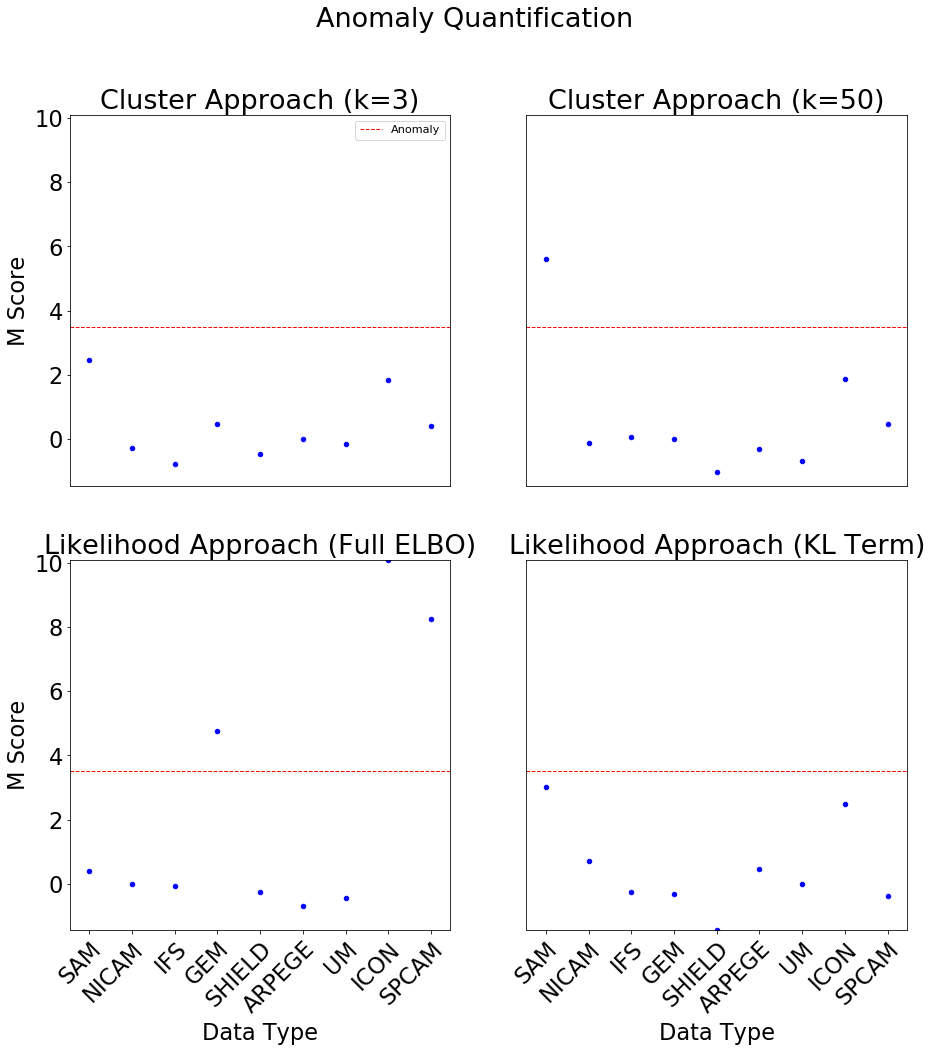

In [11]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
models = ["SAM","NICAM","IFS","GEM","SHIELD","ARPEGE","UM","ICON","SPCAM"]
x_values = np.arange(0,9,1)


ax[1,0].set_xlabel("Data Type")
ax[1,1].set_xlabel("Data Type")
ax[0,0].set_ylabel("M Score")
ax[1,0].set_ylabel("M Score")
ax[0,0].set_xticks(np.arange(len(models)))
ax[0,1].set_xticks(np.arange(len(models)))
ax[1,0].set_xticks(np.arange(len(models)))
ax[1,1].set_xticks(np.arange(len(models)))
ax[1,0].set_xticklabels(models)
ax[1,1].set_xticklabels(models)
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[1,1].set_yticks([])

ax[0,0].axhline(y=3.5, color='r', linestyle='--', label="Anomaly", linewidth=1)
ax[0,1].axhline(y=3.5, color='r', linestyle='--', label="Anomaly", linewidth=1)
ax[1,0].axhline(y=3.5, color='r', linestyle='--', label="Anomaly", linewidth=1)
ax[1,1].axhline(y=3.5, color='r', linestyle='--', label="Anomaly", linewidth=1)


ax[0,0].scatter(x_values, m3_k3_M, s=20, c="b")
ax[0,1].scatter(x_values, m3_k50_M, s=20, c="b")
ax[1,0].scatter(x_values, m2_elbo_M, s=20, c="b")
ax[1,1].scatter(x_values, m2_prior_M, s=20, c="b")

ax[0,0].set_title("Cluster Approach (k=3)")
ax[0,1].set_title("Cluster Approach (k=50)")
ax[1,0].set_title("Likelihood Approach (Full ELBO)")
ax[1,1].set_title("Likelihood Approach (KL Term)")
ax[0,0].legend(fontsize=fz*0.5)

ax[0,0].set_ylim(min_val,max_val)
ax[0,1].set_ylim(min_val,max_val)
ax[1,0].set_ylim(min_val,max_val)
ax[1,1].set_ylim(min_val,max_val)

#ax.legend()
plt.setp(ax[1,0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[1,1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.suptitle("Anomaly Quantification")
plt.savefig("Figures/Outliers_M_Score.png")

# T Score

In [12]:
def T_Gen(array):
    p = np.empty(shape=len(array))
    a_mean = np.mean(array)
    a_std = np.std(array)
    for i in range(len(array)):
        T_Score = (array[i]-a_mean)/(a_std/(np.sqrt(len(array))))
        #p[i] = scipy.stats.t.sf(abs(T_Score), df=len(array)-1)
        p[i] = T_Score
    
    return p

In [13]:
m3_k3_T = T_Gen(m3_k3_sum)
m3_k50_T = T_Gen(m3_k50_sum)
m2_elbo_T = T_Gen(m2_elbo_sum)
m2_prior_T = T_Gen(m2_prior_sum)

In [14]:
min_val_T = np.min(np.array([np.min(m3_k3_T),np.min(m3_k50_T),np.min(m2_elbo_T),np.min(m2_prior_T)]))
max_val_T = np.max(np.array([np.max(m3_k3_T),np.max(m3_k50_T),np.max(m2_elbo_T),np.max(m2_prior_T)]))

No handles with labels found to put in legend.


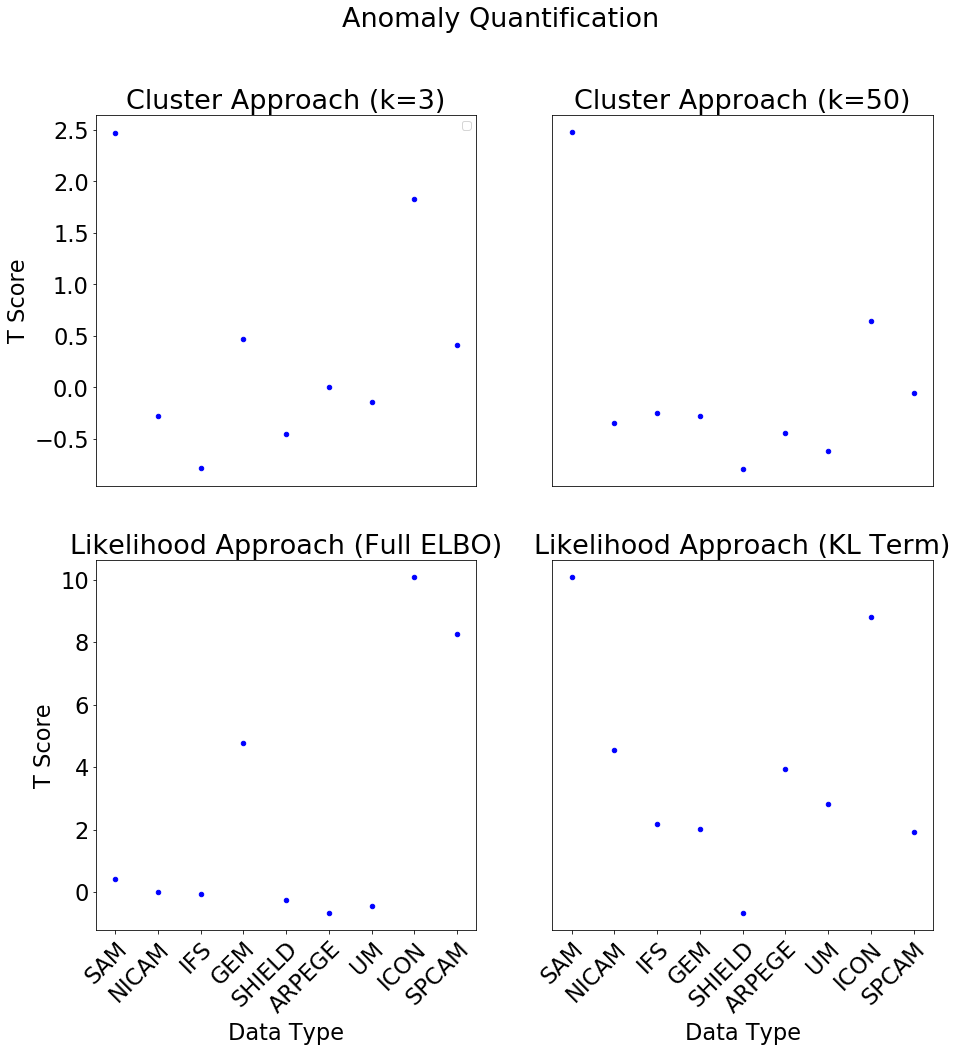

In [15]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
models = ["SAM","NICAM","IFS","GEM","SHIELD","ARPEGE","UM","ICON","SPCAM"]
x_values = np.arange(0,9,1)


ax[1,0].set_xlabel("Data Type")
ax[1,1].set_xlabel("Data Type")
ax[0,0].set_ylabel("T Score")
ax[1,0].set_ylabel("T Score")
ax[0,0].set_xticks(np.arange(len(models)))
ax[0,1].set_xticks(np.arange(len(models)))
ax[1,0].set_xticks(np.arange(len(models)))
ax[1,1].set_xticks(np.arange(len(models)))
ax[1,0].set_xticklabels(models)
ax[1,1].set_xticklabels(models)
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[1,1].set_yticks([])

ax[0,0].scatter(x_values, m3_k3_M, s=20, c="b")
ax[0,1].scatter(x_values, m3_k50_M, s=20, c="b")
ax[1,0].scatter(x_values, m2_elbo_M, s=20, c="b")
ax[1,1].scatter(x_values, m2_prior_M, s=20, c="b")

ax[0,0].set_title("Cluster Approach (k=3)")
ax[0,1].set_title("Cluster Approach (k=50)")
ax[1,0].set_title("Likelihood Approach (Full ELBO)")
ax[1,1].set_title("Likelihood Approach (KL Term)")
ax[0,0].legend(fontsize=fz*0.5)

min_val = 0.00001
max_val = 0.5

#ax[0,0].set_yscale("log")
#ax[0,1].set_yscale("log")
#ax[1,0].set_yscale("log")
#ax[1,1].set_yscale("log")

#ax[0,0].set_ylim(min_val_T,max_val_T)
#ax[0,1].set_ylim(min_val_T,max_val_T)
#ax[1,0].set_ylim(min_val_T,max_val_T)
#ax[1,1].set_ylim(min_val_T,max_val_T)

#ax.legend()
plt.setp(ax[1,0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[1,1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.suptitle("Anomaly Quantification")
plt.savefig("Figures/Outliers_T_Score.png")

# Paper Figure

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


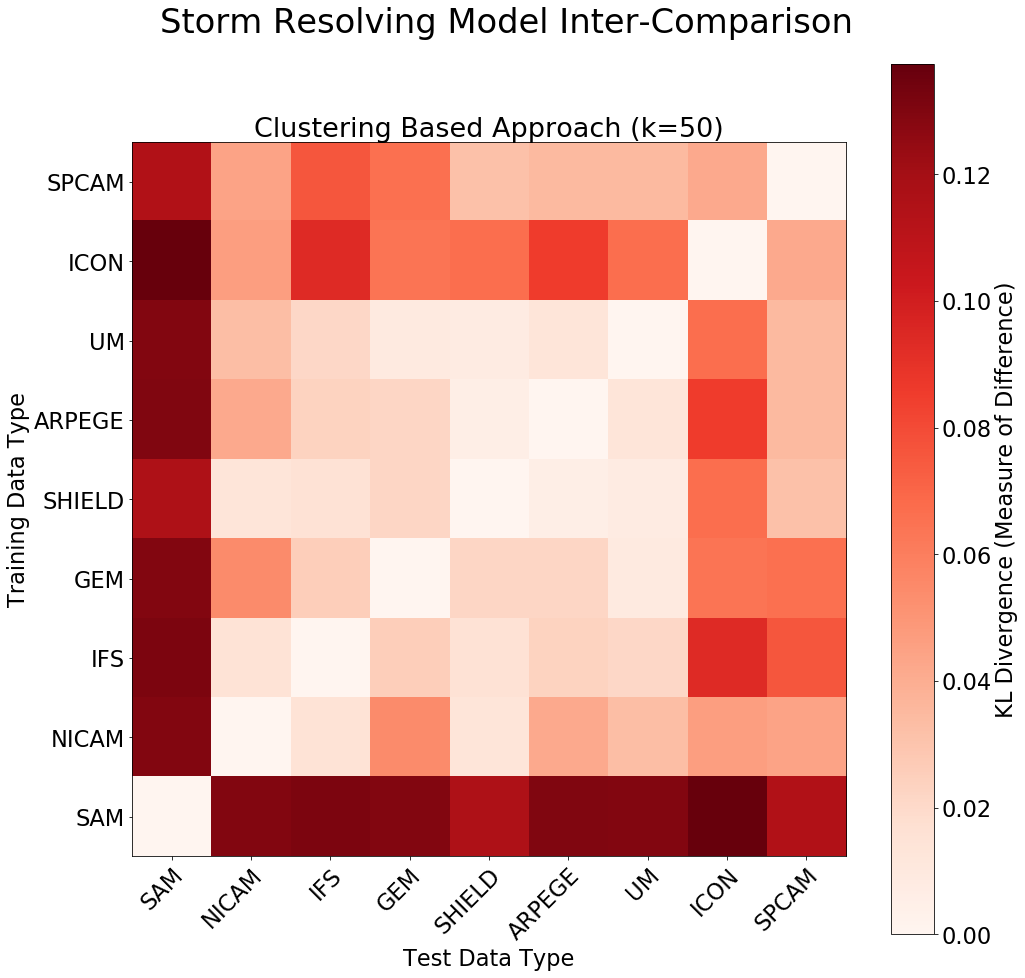

In [16]:
fig, ax = plt.subplots(figsize=(16,16))
models = ["SAM","NICAM","IFS","GEM","SHIELD","ARPEGE","UM","ICON","SPCAM"]
models_y = ["SPCAM","ICON", "UM", "ARPEGE", "SHIELD", "GEM", "IFS", "NICAM", "SAM"]


im = ax.imshow(m3_k50, cmap="Reds")

#p0 = ax.get_position().get_points().flatten()
#p2 = ax.get_position().get_points().flatten()
#ax_cbar = fig.add_axes([p0[0], 0.04, p0[1]+0.2, 0.03])
#cbar = fig.colorbar(im, label='KL Divergence', cax=ax_cbar, orientation='horizontal')
#cbar.ax.tick_params(labelsize=fz*0.8) 

#ax[0].set_xlabel("Training Data")

fig.colorbar(im, ax=ax, label="KL Divergence (Measure of Difference)")

ax.set_xlabel("Test Data Type")
ax.set_ylabel("Training Data Type")
ax.set_title("Clustering Based Approach (k=50)")
ax.set_xticks(np.arange(len(models)))
ax.set_yticks(np.arange(len(models)))
ax.set_xticklabels(models)
ax.set_yticklabels(models_y)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.suptitle("Storm Resolving Model Inter-Comparison", y = 0.93, x=0.45, fontsize=fz*1.5)
plt.savefig("Figures/PNAS_Figure_1.png")
plt.savefig("Figures/PNAS_Figure_1.pdf")
print(" ")

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.


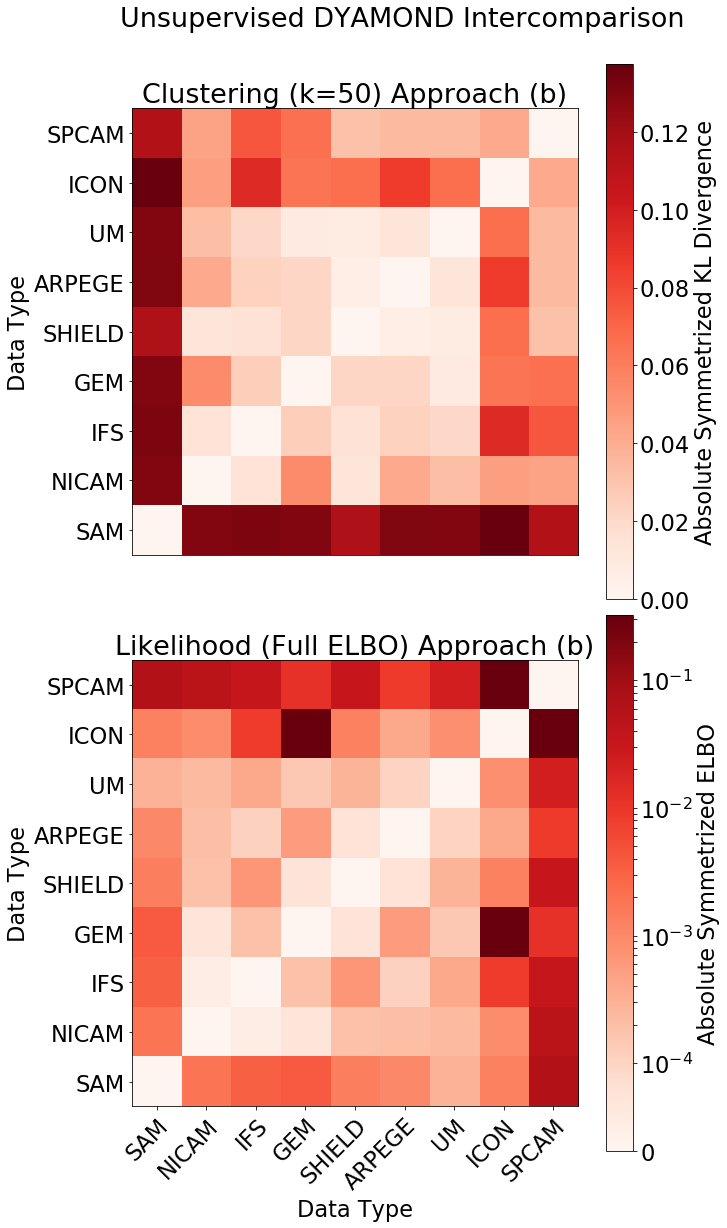

In [17]:
fig, ax = plt.subplots(2,1,figsize=(10,20))
models = ["SAM","NICAM","IFS","GEM","SHIELD","ARPEGE","UM","ICON","SPCAM"]
models_y = ["SPCAM","ICON", "UM", "ARPEGE", "SHIELD", "GEM", "IFS", "NICAM", "SAM"]


im = ax[0].imshow(m3_k50, cmap="Reds")

fig.colorbar(im, ax=ax[0], label="Absolute Symmetrized KL Divergence")

ax[0].set_ylabel("Data Type")
ax[0].set_title("Clustering (k=50) Approach (b)")
ax[0].set_xticks(np.arange(len(models)))
ax[0].set_yticks(np.arange(len(models)))
ax[0].set_xticklabels(models)
ax[0].set_yticklabels(models_y)
ax[0].set_xticks([])

im = ax[1].imshow(m2_elbo, cmap="Reds", norm=matplotlib.colors.SymLogNorm(linthresh=(0.0001)))

fig.colorbar(im, ax=ax[1], label="Absolute Symmetrized ELBO")
 

ax[1].set_xlabel("Data Type")
ax[1].set_ylabel("Data Type")
ax[1].set_title("Likelihood (Full ELBO) Approach (b)")
ax[1].set_xticks(np.arange(len(models)))
ax[1].set_yticks(np.arange(len(models)))
ax[1].set_xticklabels(models)
ax[1].set_yticklabels(models_y)

plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.suptitle("Unsupervised DYAMOND Intercomparison", y=0.92)
plt.subplots_adjust(hspace=0.03)
plt.savefig("Figures/PNAS_Figure_1.png", bbox_inches='tight',pad_inches = 0)
plt.savefig("Figures/PNAS_Figure_1.pdf", bbox_inches='tight',pad_inches = 0)
print(" ")

In [18]:
#from scipy import stats
#pearson_r, pearson_p = stats.pearsonr(m3_k50.ravel(), m2_elbo.ravel())
#print("The Zonal R2 is:",pearson_r**2)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


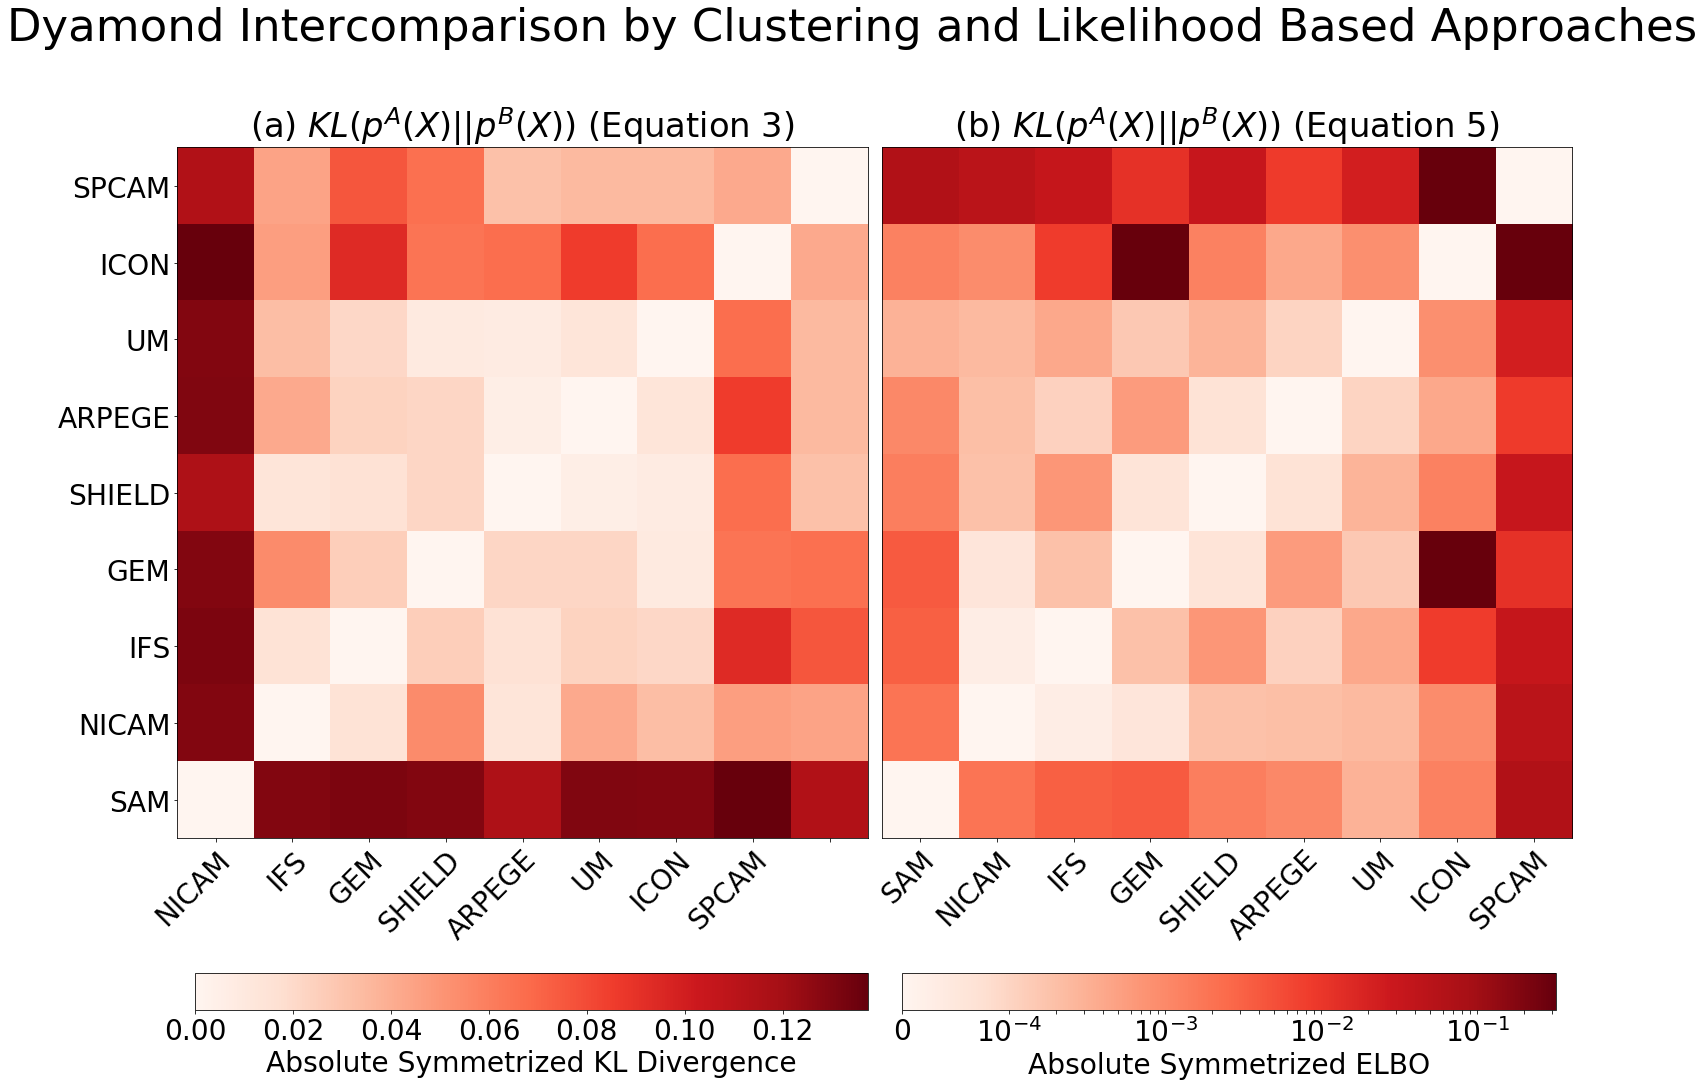

In [19]:
fig, ax = plt.subplots(1,2,figsize=(25,17))
models = ["SAM","NICAM","IFS","GEM","SHIELD","ARPEGE","UM","ICON","SPCAM"]
models_y = ["SPCAM","ICON", "UM", "ARPEGE", "SHIELD", "GEM", "IFS", "NICAM", "SAM"]


im = ax[0].imshow(m3_k50, cmap="Reds")

p0 = ax[0].get_position().get_points().flatten()
p2 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.01, 0.08, p0[1]+0.13, 0.03])
cbar = fig.colorbar(im, cax=ax_cbar, orientation='horizontal')
cbar.set_label('Absolute Symmetrized KL Divergence', fontsize=fz*1.25)
cbar.ax.tick_params(labelsize=fz*1.25) 

#ax[0].set_ylabel("Data Type")
ax[0].set_title(r"(a) $KL(p^A(X)||p^B(X))$ (Equation 3)", fontsize=fz*1.5)
ax[0].set_yticks(np.arange(len(models)))
ax[0].set_yticklabels(models_y, fontsize=fz*1.25)
ax[0].set_xticklabels(models, fontsize=fz*1.25)

im = ax[1].imshow(m2_elbo, cmap="Reds", norm=matplotlib.colors.SymLogNorm(linthresh=(0.0001)))

p0 = ax[1].get_position().get_points().flatten()
p2 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]-0.02, 0.08, p0[1]+0.12, 0.03])
cbar = fig.colorbar(im, cax=ax_cbar, orientation='horizontal')
cbar.set_label('Absolute Symmetrized ELBO', fontsize=fz*1.25)
cbar.ax.tick_params(labelsize=fz*1.25)  

ax[1].set_title(r"(b) $KL(p^A(X)||p^B(X))$ (Equation 5)", fontsize=fz*1.5)
ax[1].set_xticks(np.arange(len(models)))
ax[1].set_yticks([])
ax[1].set_xticklabels(models, fontsize=fz*1.25)
ax[1].set_yticklabels(models_y)

plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.subplots_adjust(wspace=0.02)
plt.suptitle("Dyamond Intercomparison by Clustering and Likelihood Based Approaches", fontsize=fz*2, y=0.9)
plt.savefig("Figures/Climate_Model_Intercomparison.png", bbox_inches='tight',pad_inches = 0)
plt.savefig("Figures/Climate_Model_Intercomparison.pdf", bbox_inches='tight',pad_inches = 0)
print(" ")

# SI Figures

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


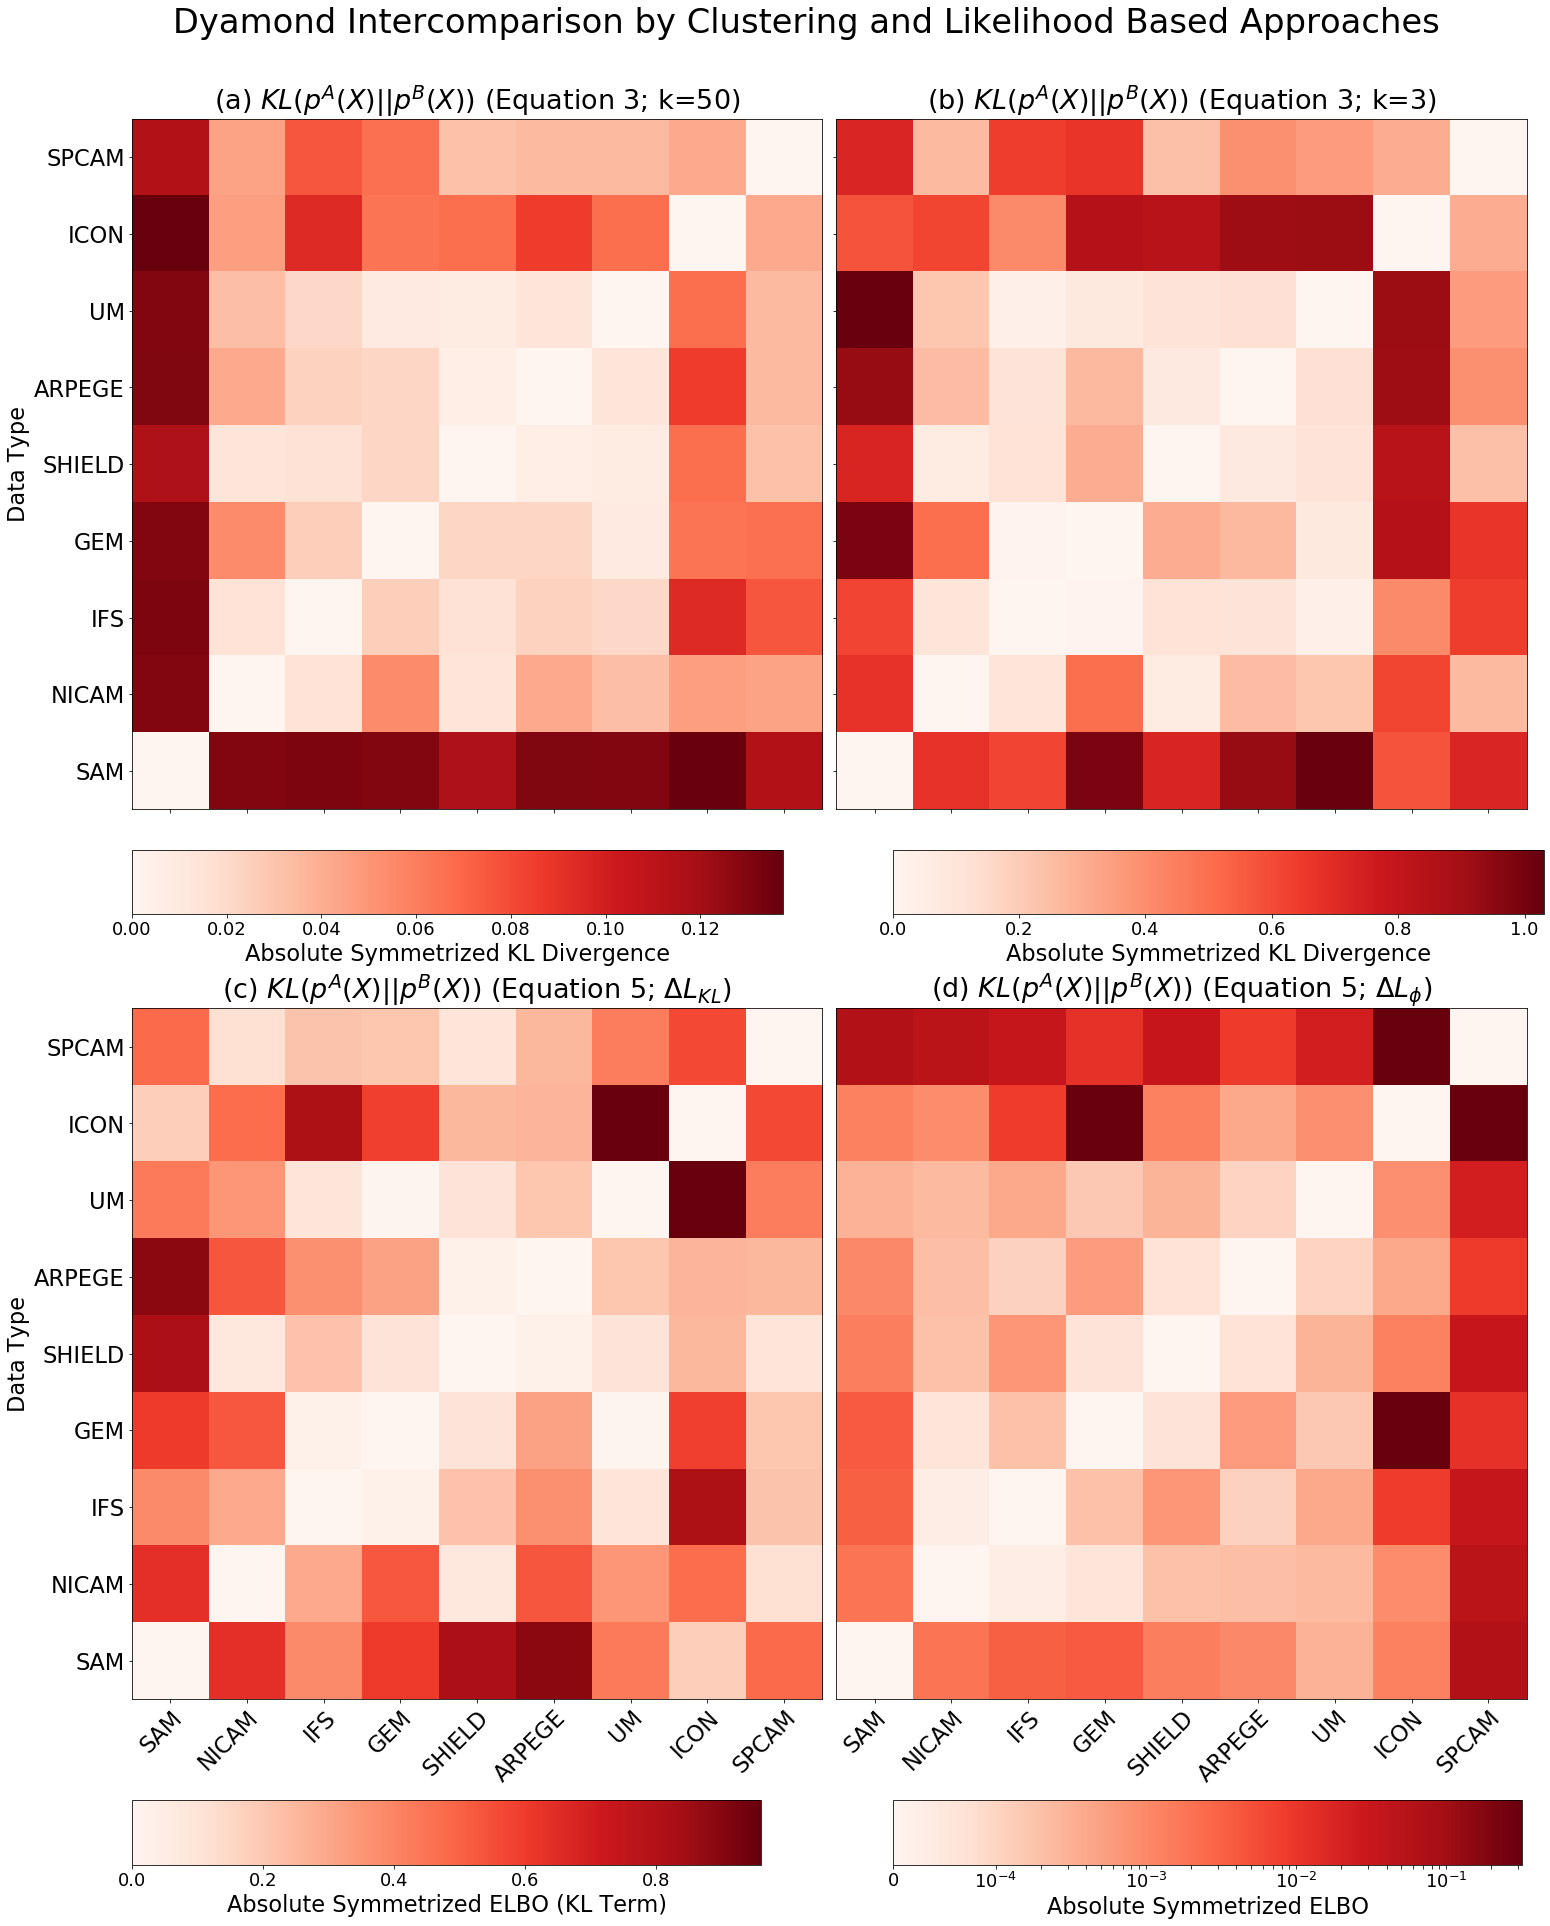

In [20]:
fig, ax = plt.subplots(2,2,figsize=(25,30))
models = ["SAM","NICAM","IFS","GEM","SHIELD","ARPEGE","UM","ICON","SPCAM"]
models_y = ["SPCAM","ICON", "UM", "ARPEGE", "SHIELD", "GEM", "IFS", "NICAM", "SAM"]


im = ax[0,0].imshow(m3_k50, cmap="Reds")

p0 = ax[0,0].get_position().get_points().flatten()
p2 = ax[0,0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.5, p0[1]-0.2, 0.03])
cbar = fig.colorbar(im, label='Absolute Symmetrized KL Divergence', cax=ax_cbar, orientation='horizontal')
cbar.ax.tick_params(labelsize=fz*0.8) 

ax[0,0].set_ylabel("Data Type")
ax[0,0].set_title(r"(a) $KL(p^A(X)||p^B(X))$ (Equation 3; k=50)")
ax[0,0].set_yticks(np.arange(len(models)))
ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels(models_y)

im = ax[0,1].imshow(m3_k3, cmap="Reds")

p0 = ax[0,1].get_position().get_points().flatten()
p2 = ax[0,1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.5, p0[1]-0.2, 0.03])
cbar = fig.colorbar(im, label='Absolute Symmetrized KL Divergence', cax=ax_cbar, orientation='horizontal')
cbar.ax.tick_params(labelsize=fz*0.8) 

ax[0,1].set_title(r"(b) $KL(p^A(X)||p^B(X))$ (Equation 3; k=3)")
ax[0,1].set_yticks(np.arange(len(models)))
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])

im = ax[1,0].imshow(m2_prior, cmap="Reds")
ax[1,0].set_ylabel("Data Type")
p0 = ax[1,0].get_position().get_points().flatten()
p2 = ax[1,0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.06, p0[1]+0.2, 0.03])
cbar = fig.colorbar(im, label='Absolute Symmetrized ELBO (KL Term)', cax=ax_cbar, orientation='horizontal')
cbar.ax.tick_params(labelsize=fz*0.8)  

ax[1,0].set_title(r"(c) $KL(p^A(X)||p^B(X))$ (Equation 5; $\Delta {\mathit{L}}_{KL}$)")
ax[1,0].set_xticks(np.arange(len(models)))
ax[1,0].set_yticks(np.arange(len(models)))
ax[1,0].set_xticklabels(models)
ax[1,0].set_yticklabels(models_y)

im = ax[1,1].imshow(m2_elbo, cmap="Reds", norm=matplotlib.colors.SymLogNorm(linthresh=(0.0001)))

p0 = ax[1,1].get_position().get_points().flatten()
p2 = ax[1,1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.06, p0[1]+0.2, 0.03])
cbar = fig.colorbar(im, label='Absolute Symmetrized ELBO', cax=ax_cbar, orientation='horizontal')
cbar.ax.tick_params(labelsize=fz*0.8)  

ax[1,1].set_title(r"(d) $KL(p^A(X)||p^B(X))$ (Equation 5; $\Delta {\mathit{L}}_{\phi}$)")
ax[1,1].set_xticks(np.arange(len(models)))
ax[1,1].set_yticks([])
ax[1,1].set_xticklabels(models)
ax[1,1].set_yticklabels(models_y)

plt.setp(ax[1,0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[1,1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.subplots_adjust(wspace=0.02)
plt.suptitle("Dyamond Intercomparison by Clustering and Likelihood Based Approaches", fontsize=fz*1.5, y=0.92)
plt.savefig("Figures/PNAS_Full_Method_Comparison.png")
plt.savefig("Figures/PNAS_Full_Method_Comparison.pdf")
print(" ")